# Prediction of the electrical consumption needs of buildings

# Content
- [Context of the problem](#Context-of-the-problem)
- [Pre-exploratory stage: General analysis and discovery of the files](#Pre-exploratory-stage:-General-analysis-and-discovery-of-the-files)
- [Exploratory analysis and data cleaning](#Exploratory-analysis-and-data-cleaning)
- [Pickling the cleaned data frame](#Pickling-the-cleaned-data-frame)

## Context of the problem

The project consists on creating data based strategies for the city of Seattle in the USA. To achieve the goal of a carbon-neutral city by 2050, the team is paying close attention to emissions from non-residential buildings. Consumption data can be downloaded at this address https://www.kaggle.com/city-of-seattle/sea-building-energy-benchmarking#2015-building-energy-benchmarking.csv.

Predictions will be based on the declarative data of the commercial operating permit (size and use of buildings, mention of recent work, date of construction, etc.) 
We are also interested to assess the value of the "ENERGY STAR Score" for predicting emissions, which is tedious to calculate with the approach currently used.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Use seaborn style defaults and set the default figure size
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 6)})

We have two data files corresponding to the years of 2015 and 2016. We will explore them:

## Pre-exploratory stage: General analysis and discovery of the files

### Description of 2015 data file:

In [2]:
data_file_2015 = pd.read_csv('2015-building-energy-benchmarking.csv')

In [3]:
print("The file contains {} rows and {} columns".format(data_file_2015.shape[0],data_file_2015.shape[1]))

The file contains 3340 rows and 47 columns


In [4]:
print(data_file_2015.columns)

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

In [5]:
data_file_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

### Description of 2016 data file:

In [6]:
data_file_2016 = pd.read_csv('2016-building-energy-benchmarking.csv')

In [7]:
print("The file contains {} rows and {} columns".format(data_file_2016.shape[0],data_file_2015.shape[1]))

The file contains 3376 rows and 47 columns


In [8]:
print(data_file_2016.columns)

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [9]:
data_file_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

### Comparison between 2015 and 2016 data files:

We will verify now if the data files from 2015 and 2016 have the same shape.

In [10]:
list_data_file_2015 = list(data_file_2015)
list_data_file_2016 = list(data_file_2016)

In [11]:
list_data_file_2016 == list_data_file_2015

False

The datafiles from years 2015 and 2016 are different. To verify which columns are different:

In [12]:
# Code extracted from https://stackoverflow.com/questions/50203732/compare-column-names-of-pandas-dataframe

def comparison_columns_data_files(data_file_A, data_file_B):
    data_file_A_column = data_file_A.columns
    data_file_B_column = data_file_B.columns

    common_columns = data_file_A_column.intersection(data_file_B_column) # common columns between data frames
    data_file_A_not_in_data_file_B = data_file_A_column.difference(data_file_B_column) # Columns that are in 2015 data file that are not in 2016 data file
    data_file_B_not_in_data_file_A = data_file_B_column.difference(data_file_A_column) # Columns that are in 2016 data file that are not in 2015 data file

    return (common_columns, data_file_A_not_in_data_file_B, data_file_B_not_in_data_file_A)

In [13]:
comparison_columns_data_files(data_file_2015, data_file_2016)

(Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
        'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
        'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
        'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
        'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
        'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
        'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
        'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
        'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
        'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
        'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
        'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
        'DefaultData', 'ComplianceStatus', 'Outlier'],
       dtype='object'),
 Index(['2010 Census Tracts', 'City Council Distr

We will have a look at the column 'Location' from the 2015 data file.

In [14]:
data_file_2015['Location']

0       {'latitude': '47.61219025', 'longitude': '-122...
1       {'latitude': '47.61310583', 'longitude': '-122...
2       {'latitude': '47.61334897', 'longitude': '-122...
3       {'latitude': '47.61421585', 'longitude': '-122...
4       {'latitude': '47.6137544', 'longitude': '-122....
                              ...                        
3335    {'latitude': '47.59950256', 'longitude': '-122...
3336    {'latitude': '47.65752471', 'longitude': '-122...
3337    {'latitude': '47.61649845', 'longitude': '-122...
3338    {'latitude': '47.68396954', 'longitude': '-122...
3339    {'latitude': '47.68396954', 'longitude': '-122...
Name: Location, Length: 3340, dtype: object

As we observe from the 2015 data file, Location column contains information about the latitude and longitude coordinates, which are present as columns in the 2016 data file. We will separate the information contained in 'Location' column o obtain the latitude and longitude information in order to put it into two separate columns.

In [15]:
# See reference code at https://www.kaggle.com/marcbourgeois/p-lec-01-cleaning
import ast
data_file_2015['Location'] = [ast.literal_eval(str(item)) for index, item in data_file_2015.Location.iteritems()]
data_file_2015 = pd.concat([data_file_2015.drop(['Location'], axis=1), data_file_2015['Location'].apply(pd.Series)], axis=1)
data_file_2015['human_address'] = [ast.literal_eval(str(item)) for index, item in data_file_2015.human_address.iteritems()]
data_file_2015 = pd.concat([data_file_2015.drop(['human_address'], axis=1), data_file_2015['human_address'].apply(pd.Series)], axis=1)
data_file_2015[['longitude', 'latitude']] = data_file_2015[['longitude', 'latitude']].apply(pd.to_numeric) 

In [16]:
data_file_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 52 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   CouncilDistrictCode                                            3340 non-null   int64  
 7   Neighborhood                                                

In [17]:
data_file_2015[['longitude', 'latitude']] = data_file_2015[['longitude', 'latitude']].apply(pd.to_numeric) 

### Revision of data files variables

As the mission of the project is regarding the CO2 emissions, we should pay special atention to the variables 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'GHGEmissionsIntensity' and 'TotalGHGEmissions'.

As described at https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy, we have:

* **The variable 'GHGEmissionsIntensity' or 'GHGEmissionsIntensity(kgCO2e/ft2)'**, is the total Greenhouse Gas Emissions divided by property's gross floor area, measured in kilograms of carbon dioxide equivalent per square foot. This calculation uses a GHG emissions factor from Seattle City Light's portfolio of generating resources.

* **The variable 'TotalGHGEmissions' or 'GHGEmissions(MetricTonsCO2e)'**, is the total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent. This calculation uses a GHG emissions factor from Seattle City Light's portfolio of generating resources. This uses Seattle City Light's 2015 emissions factor of 52.44 lbs CO2e/MWh until the 2016 factor is available. Enwave steam factor = 170.17 lbs CO2e/MMBtu. Gas factor sourced from EPA Portfolio Manager = 53.11 kg CO2e/MBtu.

In [18]:
data_file_2015['GHGEmissions(MetricTonsCO2e)'].describe()

count     3330.000000
mean       110.094102
std        409.450179
min          0.000000
25%          9.265000
50%         32.740000
75%         88.642500
max      11824.890000
Name: GHGEmissions(MetricTonsCO2e), dtype: float64

In [19]:
data_file_2016['TotalGHGEmissions'].describe()      

count     3367.000000
mean       119.723971
std        538.832227
min         -0.800000
25%          9.495000
50%         33.920000
75%         93.940000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

In [20]:
data_file_2015['GHGEmissionsIntensity(kgCO2e/ft2)'].describe()

count    3330.000000
mean        0.985339
std         1.637172
min         0.000000
25%         0.080000
50%         0.460000
75%         1.180000
max        31.380000
Name: GHGEmissionsIntensity(kgCO2e/ft2), dtype: float64

In [21]:
data_file_2016['GHGEmissionsIntensity'].describe()


count    3367.000000
mean        1.175916
std         1.821452
min        -0.020000
25%         0.210000
50%         0.610000
75%         1.370000
max        34.090000
Name: GHGEmissionsIntensity, dtype: float64

The variables 'GHGEmissionsIntensity(kgCO2e/ft2)' and 'GHGEmissionsIntensity' are of the same order of magnitud, as for the variables 'GHGEmissions(MetricTonsCO2e)' and 'TotalGHGEmissions'. We are going to rename these variables, plus the variables 'ZipCode' and 'Zip Codes', and we are going to use the variables names from the 2016 data file.

In [22]:
new_df_2015 = data_file_2015.copy()

In [23]:
new_df_2015 = new_df_2015.rename(columns={'GHGEmissions(MetricTonsCO2e)':'TotalGHGEmissions',
                                  'GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity',
                                  'Zip Codes':'ZipCode',
                                  'latitude':'Latitude',
                                  'longitude':'Longitude',
                                  'address':'Address'})

In order to keep only the variables that we are going to use in further analyses, we will have a look first at the meaning of all the common variables of the 2015 and 2016 data files. As previously mentioned, the description of the variables is at https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy.
We will indicate here the variables relevant to our mission.

* **OSEBuildingID**: A unique identifier assigned to each property covered by the Seattle Benchmarking Ordinance for tracking and identification purposes.
* **DataYear**: Calendar year (January-December) represented by each data record.
* **BuildingType**: City of Seattle building type classification (e.g. Nonresidential, Multifamily).
* **PrimaryPropertyType**: The primary use of a property (e.g. office, retail store). Primary use is defined as a function that accounts for more than 50% of a property. This is the Property Type - EPA Calculated field from Portfolio Manager.
* **ZipCode, Latitude, Longitude and Address**: Property zip code, latitude and longitude coordinates, and physical address.
* **Neighborhood**: Property neighborhood area defined by the City of Seattle Department of Neighborhoods.
* **YearBuilt**: Year in which a property was constructed or underwent a complete renovation.
 

Regarding energy performance of buildings we have:

ENERGY STAR® is a joint program of the Environmental Protection Agency (EPA) and the Department of Energy (DOE). Its goal is to help consumers, businesses, and industry save money and protect the environment through the adoption of energy-efficient products and practices. (See ref. https://www.energy.gov/eere/buildings/energy-starr#:~:text=ENERGY%20STAR%C2%AE%20is%20a,energy%2Defficient%20products%20and%20practices).

Thus we have the following columns.

* **ENERGYSTARScore**: An EPA calculated 1-100 rating that assesses a property’s overall energy performance, based on national data to control for differences among climate, building uses, and operations. A score of 50 represents the national median.
* **SiteEUI(kBtu/sf)**: Site Energy Use Intensity (EUI) is a property's Site Energy Use divided by its gross floor area. Site Energy Use is the annual amount of all the energy consumed by the property on-site, as reported on utility bills. Site EUI is measured in thousands of British thermal units (kBtu) per square foot.
* **SourceEUI(kBtu/sf)**: Source Energy Use Intensity (EUI) is a property's Source Energy Use divided by its gross floor area. Source Energy Use is the annual energy used to operate the property, including losses from generation, transmission, & distribution. Source EUI is measured in thousands of British thermal units (kBtu) per square foot.
* **SiteEnergyUse(kBtu)**: The annual amount of energy consumed by the property from all sources of energy.
* **Electricity(kBtu)**: The annual amount of electricity consumed by the property on-site, including electricity purchased from the grid and generated by onsite renewable systems, measured in thousands of British thermal units (kBtu).
* **NaturalGas(kBtu)**: The annual amount of utility-supplied natural gas consumed by the property, measured in thousands of British thermal units (kBtu).

There are two types of EUI: site and source. Site EUI is the amount of heat and electricity a buildings consumes as reflected in utility bills. Source EUI traces heat and electricity use back to the original raw input creating a more holistic understanding of a building's energy use.

Other columns:

* **NumberofBuildings**: Number of buildings included in the property's report. In cases where a property is reporting as a campus, multiple buildings may be included in one report.
* **NumberofFloors**: Number of floors reported in Portfolio Manager.
* **PropertyGFATotal**: Total building and parking gross floor area.
* **PropertyGFABuilding(s)**: Total floor space in square feet between the outside surfaces of a building’s enclosing walls. This includes all areas inside the building(s), such as tenant space, common areas, stairwells, basements, storage, etc.
* **PropertyGFAParking**: Total space in square feet of all types of parking (Fully Enclosed, Partially Enclosed, and Open).
* **LargestPropertyUseType**: The largest use of a property (e.g. office, retail store) by GFA.
* **LargestPropertyUseTypeGFA**: The gross floor area (GFA) of the largest use of the property.
* **SecondLargestPropertyUseType**: The second largest use of a property (e.g. office, retail store) by GFA.
* **SecondLargestPropertyUseTypeGFA**: The gross floor area (GFA) of the second largest use of the property.
* **ThirdLargestPropertyUseType**: The third largest use of a property (e.g. office, retail store) by GFA.
* **ThirdLargestPropertyUseTypeGFA**: The gross floor area (GFA) of the third largest use of the property.

Generally, the gross floor area is the sum of the floor areas of the spaces within the building, including basements, mezzanine and intermediate-floored tiers, and penthouses with headroom height of 7.5 ft (2.2 meters) or greater.

We are starting the removal of some columns from the data files of 2015 and 2016 that we are not going to use in further analysis.

In [24]:
new_df_2015 = new_df_2015.drop(columns=['2010 Census Tracts', 'City Council Districts', 'Comment', 'OtherFuelUse(kBtu)', 'SPD Beats',
                                'Seattle Police Department Micro Community Policing Plan Areas', 'ZipCode', 'city', 'state', 'zip'])

In [25]:
new_df_2016 = data_file_2016.copy()

In [26]:
new_df_2016 = new_df_2016.drop(columns=['City', 'Comments', 'ZipCode', 'State'])

We will compare now if the two data frames have the same columns. If so, we will proceed to create a new data frame for each year with the variables that we will consider as relevant now based on the variables descriptions shown previously.

In [27]:
comparison_columns_data_files(new_df_2015,new_df_2016)

(Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
        'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
        'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
        'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
        'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
        'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
        'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
        'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
        'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
        'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
        'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
        'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
        'TotalGHGEmissions', 'GHGEmissionsIntensity', 'DefaultData',
        'ComplianceStatus', 'Outlier', 'Latitude', 'Longitu

### Selection of relevant columns for the creation of new data frame with 2015 and 2016 data files

The goal of our mission is to remove expensive measurements for future years (those related to energy consumption). We will exclude the following indicators from our dataset:

* 'SiteEUI(kBtu/sf)', 
* 'SourceEUI(kBtu/sf)',
* 'GHGEmissionsIntensity'
* 'Electricity(kBtu)', 
* 'NaturalGas(kBtu)'

The idea is also to avoid any indicator that depends on any of those expensive measurements. The reason of this is also to avoid data leakage, which is produced when we include variables that contain information about the target variables to be predicted in data modelling.

In [28]:
columns_for_analyses = ['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType', 'Latitude', 'Longitude', 'Address', 'Neighborhood', 'YearBuilt', 
                        'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFABuilding(s)', 
                        'PropertyGFAParking', 'TotalGHGEmissions', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType', 
                        'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA']

In [29]:
new_data_frame_2015 = new_df_2015.copy()

In [30]:
data_subset_2015 = new_data_frame_2015[columns_for_analyses]

In [31]:
data_subset_2015.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType   Latitude  \
0              1      2015  NonResidential               Hotel  47.612190   
1              2      2015  NonResidential               Hotel  47.613106   
2              3      2015  NonResidential               Hotel  47.613349   
3              5      2015  NonResidential               Hotel  47.614216   
4              8      2015  NonResidential               Hotel  47.613754   

    Longitude         Address Neighborhood  YearBuilt  ENERGYSTARScore  ...  \
0 -122.337997   405 OLIVE WAY     DOWNTOWN       1927             65.0  ...   
1 -122.333358     724 PINE ST     DOWNTOWN       1996             51.0  ...   
2 -122.337699    1900 5TH AVE     DOWNTOWN       1969             18.0  ...   
3 -122.336609  620 STEWART ST     DOWNTOWN       1926              1.0  ...   
4 -122.340924   401 LENORA ST     DOWNTOWN       1980             67.0  ...   

   PropertyGFATotal  PropertyGFABuilding(s)  PropertyGFAParking  \
0             88434                   88434                   0   
1            103566                   88502               15064   
2            961990                  961990                   0   
3             61320                   61320                   0   
4            119890                  107430               12460   

   TotalGHGEmissions  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0             249.43                   Hotel                    88434.0   
1             263.51                   Hotel                    83880.0   
2            2061.48                   Hotel                   757243.0   
3            1936.34                   Hotel                    61320.0   
4             507.70                   Hotel                   123445.0   

   SecondLargestPropertyUseType SecondLargestPropertyUseTypeGFA  \
0                           NaN                             NaN   
1                       Parking                         15064.0   
2                       Parking                        100000.0   
3                           NaN                             NaN   
4                       Parking                         68009.0   

   ThirdLargestPropertyUseType ThirdLargestPropertyUseTypeGFA  
0                          NaN                            NaN  
1                   Restaurant                         4622.0  
2                Swimming Pool                            0.0  
3                          NaN                            NaN  
4                Swimming Pool                            0.0  

[5 rows x 23 columns]

In [32]:
new_data_frame_2016 = new_df_2016.copy()

In [33]:
data_subset_2016 = new_data_frame_2016[columns_for_analyses]

In [34]:
data_subset_2016.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  Latitude  \
0              1      2016  NonResidential               Hotel  47.61220   
1              2      2016  NonResidential               Hotel  47.61317   
2              3      2016  NonResidential               Hotel  47.61393   
3              5      2016  NonResidential               Hotel  47.61412   
4              8      2016  NonResidential               Hotel  47.61375   

   Longitude          Address Neighborhood  YearBuilt  ENERGYSTARScore  ...  \
0 -122.33799    405 Olive way     DOWNTOWN       1927             60.0  ...   
1 -122.33393  724 Pine street     DOWNTOWN       1996             61.0  ...   
2 -122.33810  1900 5th Avenue     DOWNTOWN       1969             43.0  ...   
3 -122.33664   620 STEWART ST     DOWNTOWN       1926             56.0  ...   
4 -122.34047    401 LENORA ST     DOWNTOWN       1980             75.0  ...   

   PropertyGFATotal  PropertyGFABuilding(s)  PropertyGFAParking  \
0             88434                   88434                   0   
1            103566                   88502               15064   
2            956110                  759392              196718   
3             61320                   61320                   0   
4            175580                  113580               62000   

   TotalGHGEmissions  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0             249.98                   Hotel                    88434.0   
1             295.86                   Hotel                    83880.0   
2            2089.28                   Hotel                   756493.0   
3             286.43                   Hotel                    61320.0   
4             505.01                   Hotel                   123445.0   

   SecondLargestPropertyUseType SecondLargestPropertyUseTypeGFA  \
0                           NaN                             NaN   
1                       Parking                         15064.0   
2                           NaN                             NaN   
3                           NaN                             NaN   
4                       Parking                         68009.0   

   ThirdLargestPropertyUseType ThirdLargestPropertyUseTypeGFA  
0                          NaN                            NaN  
1                   Restaurant                         4622.0  
2                          NaN                            NaN  
3                          NaN                            NaN  
4                Swimming Pool                            0.0  

[5 rows x 23 columns]

### Revision of duplicated values data frame for 2015

We will check at the duplicate values by looking at the variable 'OSEBuildingID'.

In [35]:
print ("The number of duplicate values in the variable 'OSEBuildingID' of 2015 data frame is: {}".format(data_subset_2015.duplicated(subset=['OSEBuildingID']).sum()))

The number of duplicate values in the variable 'OSEBuildingID' of 2015 data frame is: 0


### Revision of duplicated values data frame for 2016

In [36]:
print ("The number of duplicate values in the variable 'OSEBuildingID' of 2016 data frame is: {}".format(data_subset_2016.duplicated(subset=['OSEBuildingID']).sum()))

The number of duplicate values in the variable 'OSEBuildingID' of 2016 data frame is: 0


### Creation of new data frame according to relevant variables

We will create now a new data frame that contains the union between 2015 and 2016 data, so that we can perform our analysis.

In [37]:
new_df_both_years = pd.concat([data_subset_2015[data_subset_2016.columns],data_subset_2016], axis = 0, ignore_index=True).sort_values(["DataYear", "OSEBuildingID"])

In [38]:
new_df_both_years.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType   Latitude  \
0              1      2015  NonResidential               Hotel  47.612190   
1              2      2015  NonResidential               Hotel  47.613106   
2              3      2015  NonResidential               Hotel  47.613349   
3              5      2015  NonResidential               Hotel  47.614216   
4              8      2015  NonResidential               Hotel  47.613754   

    Longitude         Address Neighborhood  YearBuilt  ENERGYSTARScore  ...  \
0 -122.337997   405 OLIVE WAY     DOWNTOWN       1927             65.0  ...   
1 -122.333358     724 PINE ST     DOWNTOWN       1996             51.0  ...   
2 -122.337699    1900 5TH AVE     DOWNTOWN       1969             18.0  ...   
3 -122.336609  620 STEWART ST     DOWNTOWN       1926              1.0  ...   
4 -122.340924   401 LENORA ST     DOWNTOWN       1980             67.0  ...   

   PropertyGFATotal  PropertyGFABuilding(s)  PropertyGFAParking  \
0             88434                   88434                   0   
1            103566                   88502               15064   
2            961990                  961990                   0   
3             61320                   61320                   0   
4            119890                  107430               12460   

   TotalGHGEmissions  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0             249.43                   Hotel                    88434.0   
1             263.51                   Hotel                    83880.0   
2            2061.48                   Hotel                   757243.0   
3            1936.34                   Hotel                    61320.0   
4             507.70                   Hotel                   123445.0   

   SecondLargestPropertyUseType SecondLargestPropertyUseTypeGFA  \
0                           NaN                             NaN   
1                       Parking                         15064.0   
2                       Parking                        100000.0   
3                           NaN                             NaN   
4                       Parking                         68009.0   

   ThirdLargestPropertyUseType ThirdLargestPropertyUseTypeGFA  
0                          NaN                            NaN  
1                   Restaurant                         4622.0  
2                Swimming Pool                            0.0  
3                          NaN                            NaN  
4                Swimming Pool                            0.0  

[5 rows x 23 columns]

In [39]:
print("The data frame for both years with the relevant variables contains {} rows and {} columns".format(new_df_both_years.shape[0],new_df_both_years.shape[1]))

The data frame for both years with the relevant variables contains 6716 rows and 23 columns


## Exploratory analysis and data cleaning

### Revision of missing values

We need to know how many columns have more than 40% of missing values.

In [40]:
nan_values = 100 * new_df_both_years.isna().sum() / len(new_df_both_years) 
print ("The number of columns whose missing values are bigger than 40% is: {}".format(len(nan_values[nan_values > 40])))

The number of columns whose missing values are bigger than 40% is: 4


The next function creates a graph that shows the NaN values in each column of the dataframe passed to the function.

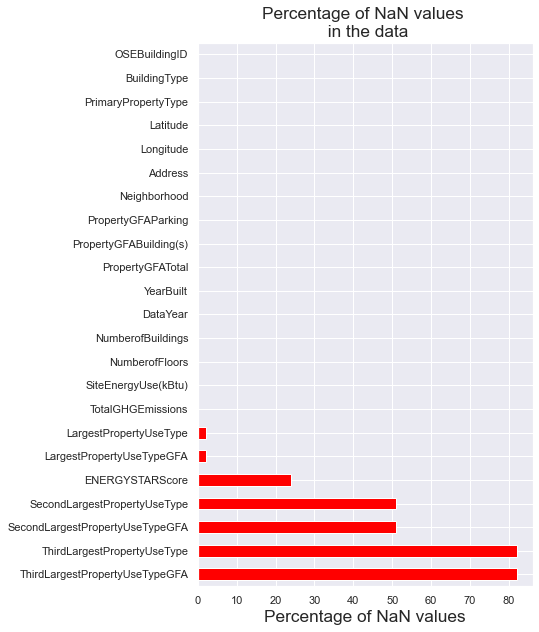

In [41]:
def graph_nan_values_per_column(data, size):

    nan_values = 100 * data.isna().sum() / len(data) 
    nan_values = nan_values.sort_values(ascending=False)
    nan_values = nan_values.astype(int)
    ax_nan_values = nan_values.plot(kind='barh', figsize=size, color='red')
    ax_nan_values.set_xlabel("Percentage of NaN values", fontsize='x-large')
    ax_nan_values.set_title("Percentage of NaN values \n in the data",fontsize='x-large')
graph_nan_values_per_column(new_df_both_years, (6,10))

We will drop those variables that have more then 40% of missing values.

In [42]:
new_df_both_years = new_df_both_years.drop(columns=['SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA'])

In [43]:
new_df_both_years.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6716 entries, 0 to 6715
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OSEBuildingID              6716 non-null   int64  
 1   DataYear                   6716 non-null   int64  
 2   BuildingType               6716 non-null   object 
 3   PrimaryPropertyType        6716 non-null   object 
 4   Latitude                   6716 non-null   float64
 5   Longitude                  6716 non-null   float64
 6   Address                    6716 non-null   object 
 7   Neighborhood               6716 non-null   object 
 8   YearBuilt                  6716 non-null   int64  
 9   ENERGYSTARScore            5093 non-null   float64
 10  SiteEnergyUse(kBtu)        6701 non-null   float64
 11  NumberofBuildings          6708 non-null   float64
 12  NumberofFloors             6708 non-null   float64
 13  PropertyGFATotal           6716 non-null   int64

### Exploratory analysis for data cleaning

Since we are mainly interested in the emissions of non-residential buildings, we are going to eliminate those values corresponding to residential buildings. For this we use the 'BuildingType' variable.

In [44]:
new_df_both_years['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Multifamily LR (1-4)', 'Campus',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [45]:
new_df_both_years = new_df_both_years[~new_df_both_years['BuildingType'].str.contains("Multifamily")]
new_df_both_years['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

With 'SPS-District K-12' being related to Seattle Public Schools.

<AxesSubplot:xlabel='count', ylabel='BuildingType'>

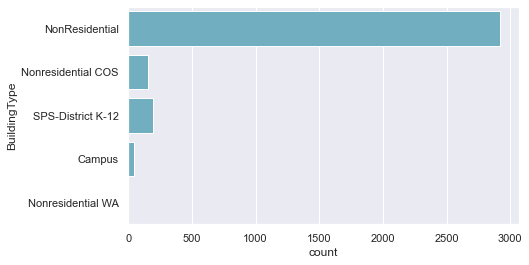

In [46]:
plt.subplots(figsize=(7, 4))
sns.countplot(y="BuildingType", data=new_df_both_years, color="c")

We are going to look at the 'PrimaryPropertyType' variable.

In [47]:
new_df_both_years['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'K-12 School',
       'College/University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility\n', 'Distribution Center', 'Large Office',
       'Retail Store', 'Senior Care Community', 'Medical Office',
       'Hospital', 'Residence Hall/Dormitory',
       'Non-Refrigerated Warehouse', 'Distribution Center\n',
       'SPS-District K-12', 'Worship Facility',
       'Supermarket/Grocery Store', 'Laboratory', 'Self-Storage Facility',
       'Refrigerated Warehouse', 'Restaurant\n', 'Low-Rise Multifamily',
       'Restaurant', 'University', 'Warehouse', 'Residence Hall',
       'Supermarket / Grocery Store', 'Office'], dtype=object)

In [48]:
new_df_both_years = new_df_both_years[~(new_df_both_years['PrimaryPropertyType'].str.contains("Residence Hall"))
                                        & ~(new_df_both_years['PrimaryPropertyType'].str.contains("Multifamily"))]

As we observed, we can regroup some categories in order to make more uniform the data for further analysis.

In [49]:
property_type = {"K-12 School" : "SPS-District K-12",
                "University" : "College/University",
                "Small- and Mid-Sized Office" : "Medical, Small-, Mid- and Large-Sized Office",
                "Large Office" : "Medical, Small-, Mid- and Large-Sized Office", 
                "Medical Office" : "Medical, Small-, Mid- and Large-Sized Office",
                "Office" : "Medical, Small-, Mid- and Large-Sized Office",
                "Supermarket/Grocery" : "Supermarket/Store",
                "Self-Storage Facility\n" : "Self-Storage Facility",
                "Distribution Center\n" : "Distribution Center",
                "Supermarket / Grocery Store" : "Supermarket/Grocery Store",
                "Restaurant\n" : "Restaurant"} 

for key, value in property_type.items():
    new_df_both_years['PrimaryPropertyType'].loc[new_df_both_years["PrimaryPropertyType"].str.contains(key, case=False, regex=False)] = value

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<AxesSubplot:xlabel='count', ylabel='PrimaryPropertyType'>

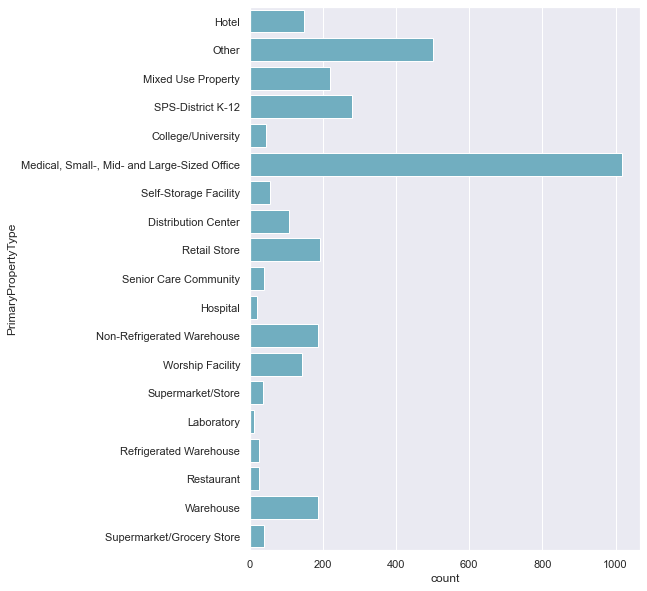

In [50]:
plt.subplots(figsize=(7, 10))
sns.countplot(y="PrimaryPropertyType", data=new_df_both_years, color="c")

We will have a look at the varibale 'LargestPropertyUseType'

In [51]:
new_df_both_years['LargestPropertyUseType'].unique()

array(['Hotel', 'Police Station', 'Other - Entertainment/Public Assembly',
       nan, 'Library', 'Fitness Center/Health Club/Gym',
       'Social/Meeting Hall', 'Courthouse', 'Other', 'K-12 School',
       'College/University', 'Automobile Dealership', 'Office',
       'Self-Storage Facility', 'Retail Store', 'Senior Care Community',
       'Medical Office', 'Hospital (General Medical & Surgical)',
       'Museum', 'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other - Lodging/Residential', 'Other/Specialty Hospital',
       'Financial Office', 'Non-Refrigerated Warehouse',
       'Distribution Center', 'Parking', 'Multifamily Housing',
       'Worship Facility', 'Laboratory', 'Supermarket/Grocery Store',
       'Convention Center', 'Urgent Care/Clinic/Other Outpatient',
       'Other - Services', 'Strip Mall', 'Wholesale Club/Supercenter',
       'Refrigerated Warehouse', 'Other - Recreation', 'Lifestyle Center',
       'Other - Public Services', 'Data Center', 'Other - M

In [52]:
new_df_both_years = new_df_both_years[~(new_df_both_years['LargestPropertyUseType'].str.contains("Residence Hall/Dormitory", na=False))
                                        & ~(new_df_both_years['LargestPropertyUseType'].str.contains("Other - Lodging/Residential", na=False))
                                        & ~(new_df_both_years['LargestPropertyUseType'].str.contains("Multifamily Housing", na=False))
                                        & ~(new_df_both_years['LargestPropertyUseType'].str.contains("Residential Care Facility", na=False))]

As observed from the Largest Property Use Type, we also had to eliminate entries corresponding to residential uses. Moreover, as previously done, we can regroup some categories to make more uniform our data for further analysis.

In [53]:
largest_property_type = {"K-12 School" : "Other - Education",
                "Urgent Care/Clinic/Other Outpatient" : "Hospital (General Medical & Surgical)",
                "Pre-school/Daycare" : "Other - Education" ,
                "Strip Mall" : "Other - Mall", 
                "Adult Education" : "Other - Education",
                "Financial Office" : "Bank Branch",
                "Other/Specialty Hospital" : "Hospital (General Medical & Surgical)" ,
                "Outpatient Rehabilitation/Physical Therapy" : "Hospital (General Medical & Surgical)" ,
                "Fitness Center/Health Club/Gym" : "Lifestyle Center" ,
                "Personal Services (Health/Beauty, Dry Cleaning, etc)" : "Lifestyle Center" ,
                "Food Service" : "Restaurant",
                "Other - Restaurant/Bar" : "Restaurant", 
                "Movie Theater" : "Other - Recreation",
                "Other - Entertainment/Public Assembly" : "Other - Recreation",
                "Performing Arts" : "Other - Recreation",
                "Worship Facility" : "Other - Recreation",
                "Convention Center" : "Other - Recreation",
                "Museum" : "Other - Recreation",
                "Medical Office" : "Office",
                "Courthouse" : "Other - Services",
                "Repair Services (Vehicle, Shoe, Locksmith, etc)" : "Other - Services",
                "Police Station" : "Other - Services",
                "Fire Station" : "Other - Services",
                "Library" : "Other - Services",
                "Automobile Dealership" : "Other - Services",
                "Other - Public Services" : "Other - Services",
                "Prison/Incarceration" : "Other",
                "Other - Utility" : "Other",
                "Wholesale Club/Supercenter" : "Other",
                "Data Center" : "Other"}

for key, value in largest_property_type.items():
    new_df_both_years['LargestPropertyUseType'].loc[new_df_both_years["LargestPropertyUseType"].str.contains(key, case=False, regex=False, na=False)] = value

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<AxesSubplot:xlabel='count', ylabel='LargestPropertyUseType'>

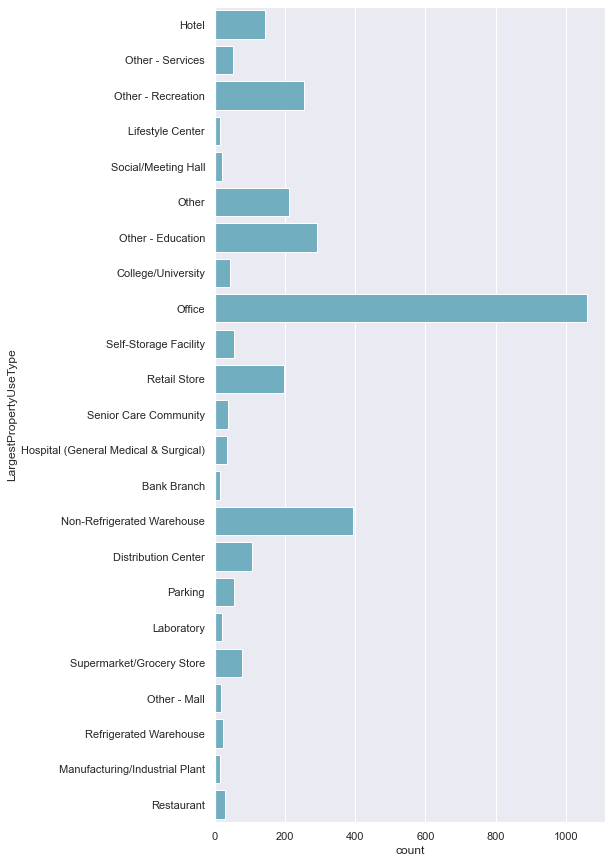

In [54]:
plt.subplots(figsize=(7, 15))
sns.countplot(y="LargestPropertyUseType", data=new_df_both_years, color="c")

We will look at the 'Neighborhood' column as well.

In [55]:
new_df_both_years['Neighborhood'].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'CENTRAL', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'SOUTHWEST', 'DELRIDGE', 'Central',
       'Ballard', 'North', 'Delridge', 'Northwest',
       'DELRIDGE NEIGHBORHOODS'], dtype=object)

As we observed, 'DELRIDGE NEIGHBORHOODS' can be replaced with just 'DELRIDGE' denomination, so we keep unique values.

In [56]:
new_df_both_years['Neighborhood'].replace('DELRIDGE NEIGHBORHOODS', 'DELRIDGE', inplace=True)
new_df_both_years['Neighborhood'] = new_df_both_years['Neighborhood'].map(lambda x: x.upper())

<AxesSubplot:xlabel='count', ylabel='Neighborhood'>

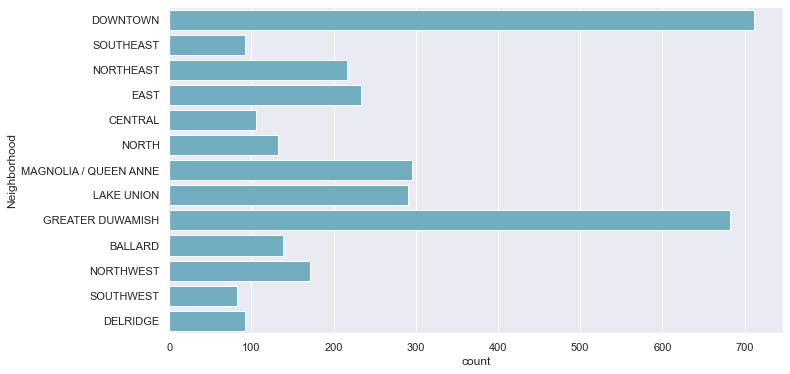

In [57]:
sns.countplot(y="Neighborhood", data=new_df_both_years, color="c")

As follows, we will try to identify entries whose values are wrong, such as negative values.

In [58]:
new_df_both_years.describe()

OSEBuildingID     DataYear     Latitude    Longitude    YearBuilt  \
count    3245.000000  3245.000000  3245.000000  3245.000000  3245.000000   
mean    15772.207704  2015.501695    47.615624  -122.333265  1961.587673   
std     13403.972043     0.500074     0.048319     0.024629    32.520876   
min         1.000000  2015.000000    47.499170  -122.411820  1900.000000   
25%       574.000000  2015.000000    47.584760  -122.343564  1930.000000   
50%     21095.000000  2016.000000    47.612123  -122.333160  1965.000000   
75%     24493.000000  2016.000000    47.648671  -122.322147  1989.000000   
max     50226.000000  2016.000000    47.733870  -122.258640  2015.000000   

       ENERGYSTARScore  SiteEnergyUse(kBtu)  NumberofBuildings  \
count      2172.000000         3.236000e+03        3243.000000   
mean         64.794199         8.170010e+06           1.119334   
std          28.596326         2.551886e+07           2.243423   
min           1.000000         0.000000e+00           0.000000   
25%          47.000000         1.222924e+06           1.000000   
50%          72.000000         2.525713e+06           1.000000   
75%          89.000000         7.005158e+06           1.000000   
max         100.000000         8.739237e+08         111.000000   

       NumberofFloors  PropertyGFATotal  PropertyGFABuilding(s)  \
count     3237.000000      3.245000e+03            3.245000e+03   
mean         4.109669      1.163989e+05            1.029717e+05   
std          6.573772      2.525742e+05            2.355297e+05   
min          0.000000      1.128500e+04           -5.055000e+04   
25%          1.000000      2.974000e+04            2.860000e+04   
50%          2.000000      4.974400e+04            4.769900e+04   
75%          4.000000      1.051000e+05            9.471300e+04   
max         99.000000      9.320156e+06            9.320156e+06   

       PropertyGFAParking  TotalGHGEmissions  LargestPropertyUseTypeGFA  
count         3245.000000        3236.000000               3.174000e+03  
mean         13427.191680         179.132166               9.637431e+04  
std          43969.698335         673.616037               2.297361e+05  
min             -2.000000          -0.800000               5.656000e+03  
25%              0.000000          19.610000               2.575300e+04  
50%              0.000000          49.060000               4.361500e+04  
75%              0.000000         139.645000               9.128100e+04  
max         512608.000000       16870.980000               9.320156e+06

As we observed in the previous table, different columns have negative values. Those are 'SourceEUI(kBtu/sf)', 'PropertyGFABuilding(s)', 'GHGEmissionsIntensity' and 'TotalGHGEmissions'. We will eliminate the negative vaules. Moreover, we cannot have zero number of buildings or floors.

In [59]:
new_df_both_years = new_df_both_years[
                                        (new_df_both_years['PropertyGFABuilding(s)']  >= 0)
                                        &(new_df_both_years['PropertyGFAParking']  >= 0)
                                        &(new_df_both_years['TotalGHGEmissions']  >= 0)
                                        &(new_df_both_years['LargestPropertyUseTypeGFA']  >= 0)
                                        &(new_df_both_years['NumberofBuildings']  > 0)
                                        &(new_df_both_years['NumberofFloors']  > 0)
                                        ]

In [60]:
new_df_both_years.describe()

OSEBuildingID     DataYear     Latitude    Longitude    YearBuilt  \
count    3090.000000  3090.000000  3090.000000  3090.000000  3090.000000   
mean    15661.688026  2015.504854    47.615640  -122.333507  1961.582848   
std     13248.106344     0.500057     0.048494     0.024501    32.524201   
min         1.000000  2015.000000    47.499170  -122.411820  1900.000000   
25%       574.000000  2015.000000    47.584460  -122.344028  1930.000000   
50%     20997.000000  2016.000000    47.612180  -122.333227  1965.000000   
75%     24450.250000  2016.000000    47.648765  -122.322267  1989.000000   
max     50226.000000  2016.000000    47.733870  -122.258640  2015.000000   

       ENERGYSTARScore  SiteEnergyUse(kBtu)  NumberofBuildings  \
count      2084.000000         3.090000e+03        3090.000000   
mean         65.053263         7.773609e+06           1.093528   
std          28.482175         2.066400e+07           1.123914   
min           1.000000         0.000000e+00           1.000000   
25%          48.000000         1.208031e+06           1.000000   
50%          73.000000         2.494590e+06           1.000000   
75%          89.000000         6.863537e+06           1.000000   
max         100.000000         4.483853e+08          39.000000   

       NumberofFloors  PropertyGFATotal  PropertyGFABuilding(s)  \
count     3090.000000      3.090000e+03            3.090000e+03   
mean         4.142395      1.120215e+05            9.863437e+04   
std          6.648589      1.930070e+05            1.694956e+05   
min          1.000000      1.128500e+04            3.636000e+03   
25%          1.000000      2.963600e+04            2.858600e+04   
50%          2.000000      4.925200e+04            4.739150e+04   
75%          4.000000      1.040000e+05            9.376725e+04   
max         99.000000      2.200000e+06            2.200000e+06   

       PropertyGFAParking  TotalGHGEmissions  LargestPropertyUseTypeGFA  
count         3090.000000        3090.000000               3.090000e+03  
mean         13387.134628         172.438191               9.244239e+04  
std          43728.477243         652.818980               1.606059e+05  
min              0.000000           0.000000               5.656000e+03  
25%              0.000000          19.407500               2.558000e+04  
50%              0.000000          48.570000               4.347300e+04  
75%              0.000000         138.167500               8.957425e+04  
max         512608.000000       16870.980000               1.719643e+06

As follows, we will visualize some of the numerical variables distributions and the buildings geographical localisation in the Seattle map.

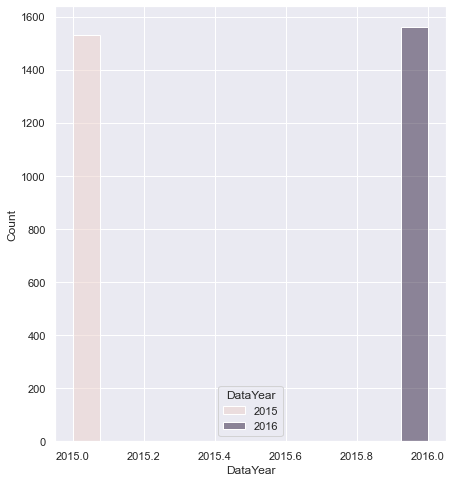

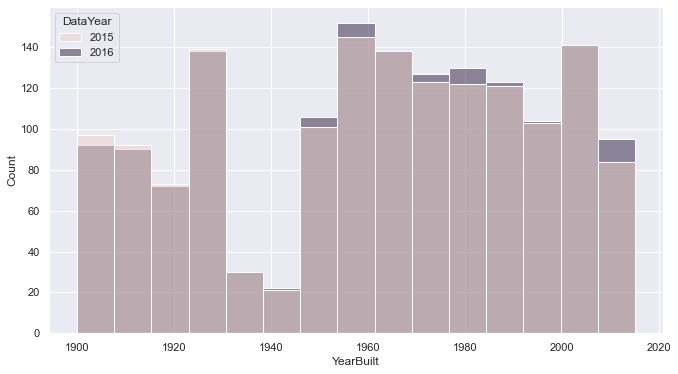

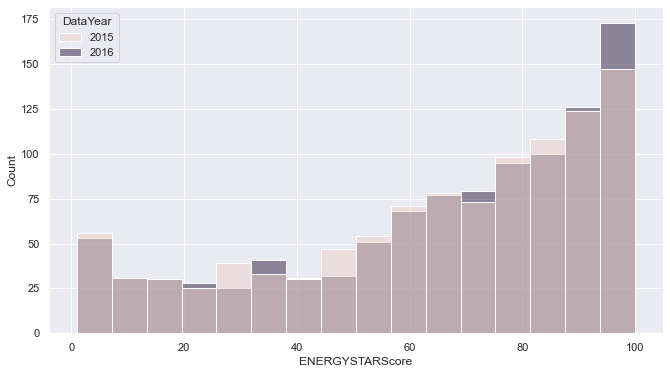

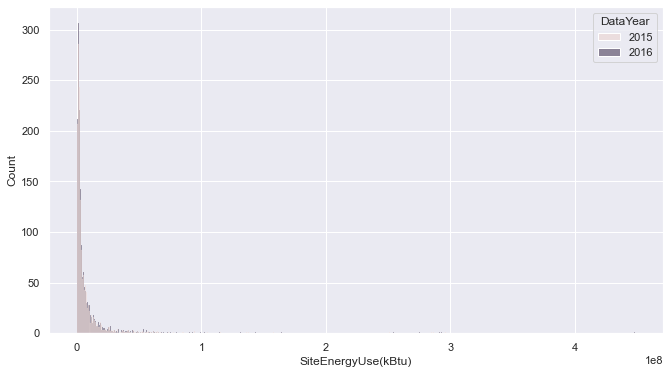

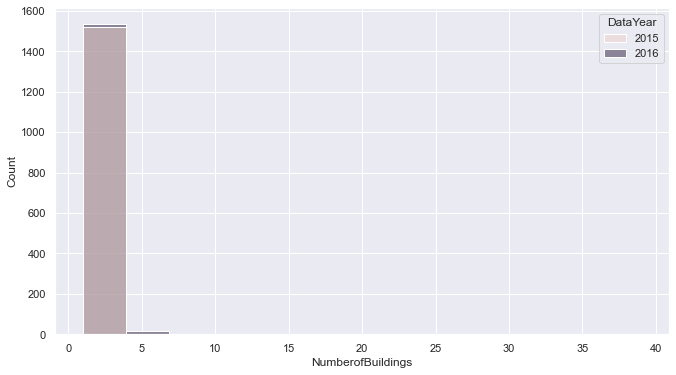

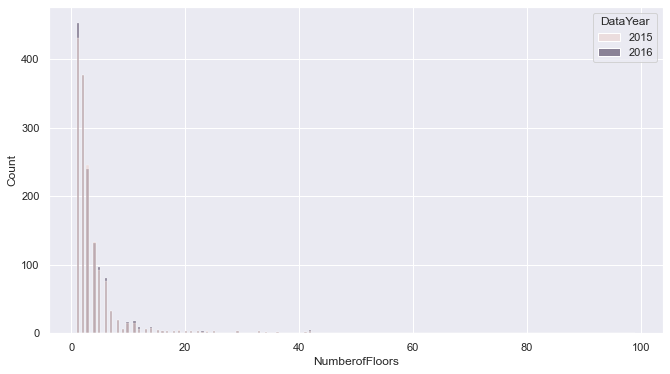

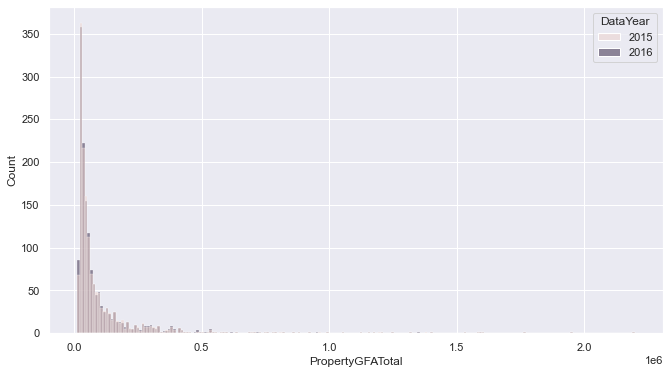

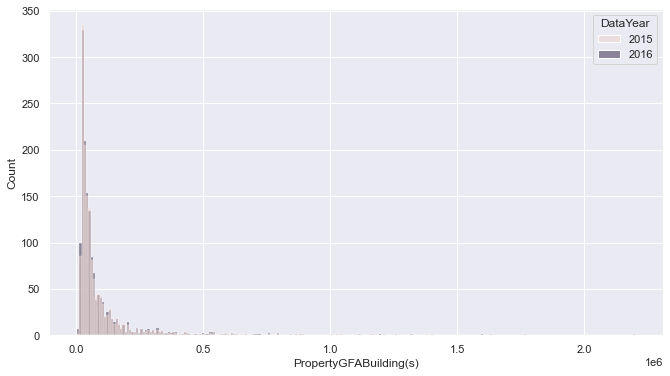

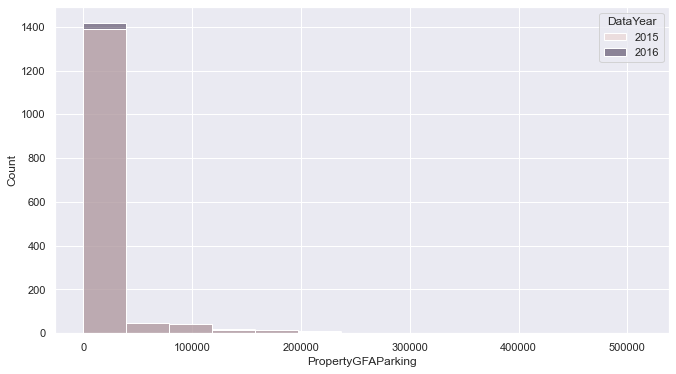

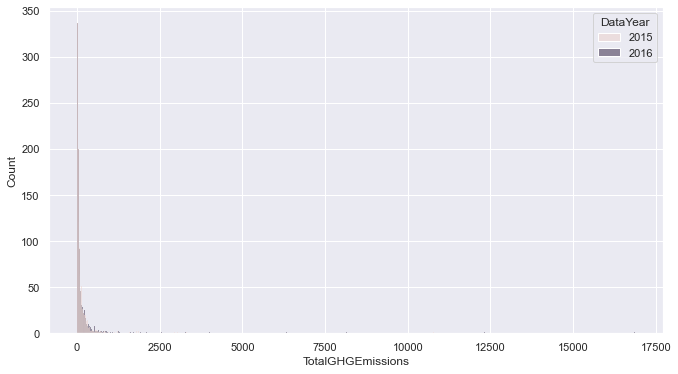

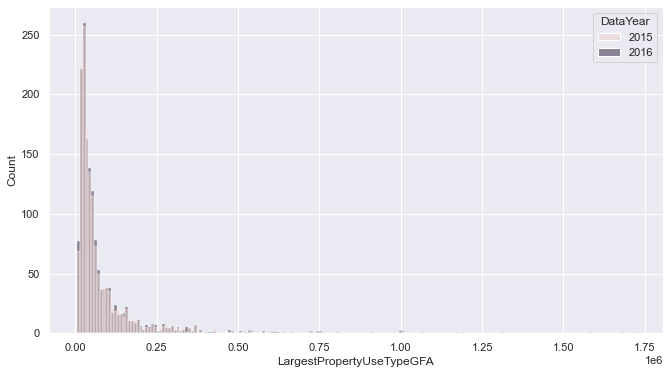

In [61]:
plt.subplots(figsize=(7, 8))

columns_to_drop_in_histogram=['BuildingType', 'PrimaryPropertyType', 'LargestPropertyUseType', 'Neighborhood', 'OSEBuildingID', 'Latitude', 'Longitude', 'Address']

for i in new_df_both_years.columns:
    if i not in columns_to_drop_in_histogram:
        sns.histplot(data=new_df_both_years, x=i, color="cyan", hue="DataYear")
        plt.show()

In [62]:
# # See reference code at https://www.kaggle.com/marcbourgeois/p-lec-01-cleaning
import folium
map_osm = folium.Map()
map_osm = folium.Map(location=[new_df_both_years['Latitude'].mean(), new_df_both_years['Longitude'].mean()], zoom_start=11, width=700, height=700, control_scale=True)
for i in range(0,len(new_df_both_years)):
    folium.Circle([new_df_both_years.iloc[i]['Latitude'],new_df_both_years.iloc[i]['Longitude']], 
                      popup=new_df_both_years.iloc[i]['Address'], radius = 70, color='red').add_to(map_osm)
map_osm

In [63]:
print("The data frame with more clean data contains {} rows and {} columns".format(new_df_both_years.shape[0],new_df_both_years.shape[1]))

The data frame with more clean data contains 3090 rows and 19 columns


### Feature engineering and variables creation

It is clear that we count on several useful variables about properties and buildings uses and surface areas. However, it will be necessary and interesting to create additional variables that can be used for values prediction of the energy consumption and green house emissions.

We will calculate for example the age of the buildings, whether a property has or not a parking, we can calculate also the ratio of the buildings and parkings surface over the total surface of the property.

We will create a variable that contains the age of the buildings.

In [64]:
new_df_both_years['BuildingAge'] = new_df_both_years['DataYear'] - new_df_both_years['YearBuilt']

We will now create a variable that contains information about whether the property has a parking or not.

In [65]:
def HasParking(row):
    if row["PropertyGFAParking"] <= 0:
        val="No"
    else:
        val="Yes"
    return val

new_df_both_years['HasParking'] = new_df_both_years.apply(HasParking, axis=1)

We will now create a variable for the surface per building and per floor.

In [66]:
new_df_both_years['GFAPerBuilding'] = new_df_both_years['PropertyGFATotal'].fillna(new_df_both_years['PropertyGFATotal'].median())/(new_df_both_years['NumberofBuildings'].fillna(new_df_both_years['NumberofBuildings'].median()))

new_df_both_years['GFAPerFloor'] = new_df_both_years['PropertyGFATotal'].fillna(new_df_both_years['PropertyGFATotal'].median())/(new_df_both_years['NumberofFloors'].fillna(new_df_both_years['NumberofFloors'].median()))

Other variables that can be created but are inherently highly correlated.

In [67]:
# new_df_both_years['FloorAreaRatio'] = new_df_both_years['PropertyGFABuilding(s)'].fillna(new_df_both_years['PropertyGFABuilding(s)'].median())/(new_df_both_years['PropertyGFATotal'].fillna(new_df_both_years['PropertyGFATotal'].median()))

In [68]:

# new_df_both_years['GFARatioParkingTotal'] = new_df_both_years['PropertyGFAParking'].fillna(new_df_both_years['PropertyGFAParking'].median())/(new_df_both_years['PropertyGFATotal'].fillna(new_df_both_years['PropertyGFATotal'].median()))

### Transformation of categorical variables into numerical values

In [69]:
new_df_transformed_all_numerical = new_df_both_years.copy()

We will first replace the missing values for the median of the distribution in the case of numerical variables and for the word "Unknown" in the case of categorical variables.

In [70]:
categorical_columns = ['BuildingType', 'PrimaryPropertyType', 'LargestPropertyUseType', 'Neighborhood', 'HasParking', 'Address']

for i in new_df_transformed_all_numerical.columns:
    if i not in categorical_columns:
        new_df_transformed_all_numerical[i].fillna(new_df_transformed_all_numerical[i].median(),inplace=True)
    else:
        new_df_transformed_all_numerical[i].fillna('Unknown',inplace=True)

In [71]:
new_df_transformed_all_numerical = new_df_transformed_all_numerical.astype({'BuildingType': 'category', 
                                                        'PrimaryPropertyType': 'category', 
                                                        'Neighborhood': 'category',
                                                        'LargestPropertyUseType': 'category',
                                                        'HasParking': 'category',
                                                        'Address': 'category'})

columns_to_categorical = new_df_transformed_all_numerical.select_dtypes(['category']).columns
new_df_transformed_all_numerical[columns_to_categorical] = new_df_transformed_all_numerical[columns_to_categorical].apply(lambda x: x.cat.codes)

We have now data without missing values and we have transformed our categorical variables into numerical.

In [72]:
new_df_transformed_all_numerical.describe()

OSEBuildingID     DataYear  BuildingType  PrimaryPropertyType  \
count    3090.000000  3090.000000   3090.000000          3090.000000   
mean    15661.688026  2015.504854      1.214239             8.131715   
std     13248.106344     0.500057      0.747538             4.528725   
min         1.000000  2015.000000      0.000000             0.000000   
25%       574.000000  2015.000000      1.000000             5.000000   
50%     20997.000000  2016.000000      1.000000             7.000000   
75%     24450.250000  2016.000000      1.000000            11.000000   
max     50226.000000  2016.000000      4.000000            18.000000   

          Latitude    Longitude      Address  Neighborhood    YearBuilt  \
count  3090.000000  3090.000000  3090.000000   3090.000000  3090.000000   
mean     47.615640  -122.333507  1452.721359      5.324595  1961.582848   
std       0.048494     0.024501   836.625388      2.859357    32.524201   
min      47.499170  -122.411820     0.000000      0.000000  1900.000000   
25%      47.584460  -122.344028   730.250000      3.000000  1930.000000   
50%      47.612180  -122.333227  1451.500000      5.000000  1965.000000   
75%      47.648765  -122.322267  2168.750000      7.000000  1989.000000   
max      47.733870  -122.258640  2911.000000     12.000000  2015.000000   

       ENERGYSTARScore  ...  PropertyGFATotal  PropertyGFABuilding(s)  \
count      3090.000000  ...      3.090000e+03            3.090000e+03   
mean         67.640453  ...      1.120215e+05            9.863437e+04   
std          23.683515  ...      1.930070e+05            1.694956e+05   
min           1.000000  ...      1.128500e+04            3.636000e+03   
25%          61.000000  ...      2.963600e+04            2.858600e+04   
50%          73.000000  ...      4.925200e+04            4.739150e+04   
75%          82.000000  ...      1.040000e+05            9.376725e+04   
max         100.000000  ...      2.200000e+06            2.200000e+06   

       PropertyGFAParking  TotalGHGEmissions  LargestPropertyUseType  \
count         3090.000000        3090.000000             3090.000000   
mean         13387.134628         172.438191               10.298382   
std          43728.477243         652.818980                4.501893   
min              0.000000           0.000000                0.000000   
25%              0.000000          19.407500                8.000000   
50%              0.000000          48.570000                9.000000   
75%              0.000000         138.167500               13.000000   
max         512608.000000       16870.980000               22.000000   

       LargestPropertyUseTypeGFA  BuildingAge   HasParking  GFAPerBuilding  \
count               3.090000e+03  3090.000000  3090.000000    3.090000e+03   
mean                9.244239e+04    53.922006     0.203883    1.076363e+05   
std                 1.606059e+05    32.521837     0.402949    1.834535e+05   
min                 5.656000e+03     1.000000     0.000000    4.300000e+03   
25%                 2.558000e+04    27.000000     0.000000    2.918600e+04   
50%                 4.347300e+04    50.000000     0.000000    4.828000e+04   
75%                 8.957425e+04    85.750000     0.000000    1.021185e+05   
max                 1.719643e+06   116.000000     1.000000    2.200000e+06   

        GFAPerFloor  
count  3.090000e+03  
mean   3.438797e+04  
std    4.810196e+04  
min    2.216970e+02  
25%    1.349775e+04  
50%    2.307500e+04  
75%    3.798133e+04  
max    1.100000e+06  

[8 rows x 23 columns]

In [73]:
print("The data frame with analysis variables contains {} rows and {} columns".format(new_df_transformed_all_numerical.shape[0],new_df_transformed_all_numerical.shape[1]))

The data frame with analysis variables contains 3090 rows and 23 columns


### Correlation analysis

We will calculate the pairwise correlation between columns and return a correlation matrix. We used the corr() function with the Kendall correlation coefficient, which measures the monotonic relationship between two variables. It does not require the variables to be normally distributed. (See reference https://www.learnpythonwithrune.org/pandas-correlation-methods-explained-pearson-kendall-and-spearman/)

In [74]:
correlation_matrix = new_df_transformed_all_numerical.corr(method='kendall')

In [75]:
print(correlation_matrix)

                           OSEBuildingID  DataYear  BuildingType  \
OSEBuildingID                   1.000000  0.010290     -0.045373   
DataYear                        0.010290  1.000000      0.017317   
BuildingType                   -0.045373  0.017317      1.000000   
PrimaryPropertyType             0.138885  0.070032      0.193660   
Latitude                       -0.012569 -0.003427      0.008089   
Longitude                       0.088753  0.009076      0.039139   
Address                         0.000589  0.007561      0.008683   
Neighborhood                    0.049312  0.005449      0.073385   
YearBuilt                      -0.046330  0.009297      0.073302   
ENERGYSTARScore                -0.024202  0.019544      0.131724   
SiteEnergyUse(kBtu)            -0.282426 -0.003368     -0.031747   
NumberofBuildings              -0.013649  0.088656     -0.141889   
NumberofFloors                 -0.249978 -0.002408     -0.129075   
PropertyGFATotal               -0.388627 -0.0021

<AxesSubplot:>

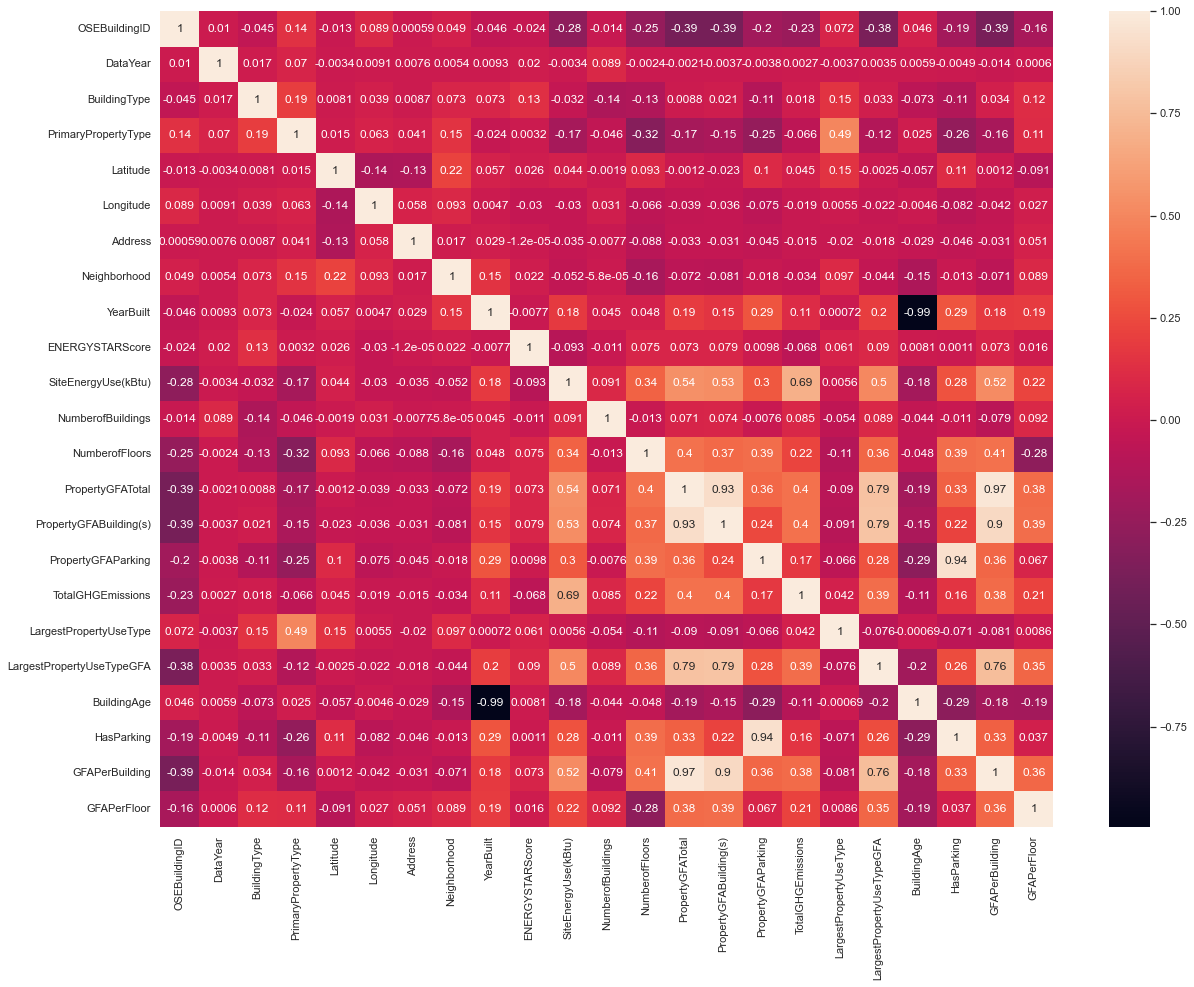

In [76]:
plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns, annot=True)

The correlation matrix allows us to identify correlations between pairs of variables as we will see next.

In [77]:
# See reference code at https://www.kaggle.com/marcbourgeois/p-lec-01-cleaning

threshold = 0.75
correlation_pairs = correlation_matrix.unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(correlation_pairs[(abs(correlation_pairs) > threshold)]).reset_index().rename(columns={0:'Correlation coefficients'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('Correlation coefficients', ascending=False)

level_0                    level_1  \
14             GFAPerBuilding           PropertyGFATotal   
12                 HasParking         PropertyGFAParking   
10     PropertyGFABuilding(s)           PropertyGFATotal   
8      PropertyGFABuilding(s)             GFAPerBuilding   
6   LargestPropertyUseTypeGFA     PropertyGFABuilding(s)   
4            PropertyGFATotal  LargestPropertyUseTypeGFA   
2              GFAPerBuilding  LargestPropertyUseTypeGFA   
0                   YearBuilt                BuildingAge   

    Correlation coefficients  
14                  0.970971  
12                  0.941702  
10                  0.927388  
8                   0.899975  
6                   0.793218  
4                   0.788412  
2                   0.762522  
0                  -0.994586

Correlation Coefficient = +1: A perfect positive relationship. 

Correlation Coefficient >= 0.8: A fairly strong positive relationship.

Correlation Coefficient <= -0.8: A fairly strong negative relationship.

We will eliminate those variables that have more than 0.75 correlation.

## Pickling the cleaned data frame

After cleaning and filtering our data we pickle the already cleaned and filtered data frame. Pickle is used for serializing and de-serializing Python object structures, also called marshalling or flattening. Serialization refers to the process of converting an object in memory to a byte stream that can be stored on disk or sent over a network. Later on, this character stream can then be retrieved and de-serialized back to a Python object. For more details, consult references:

In [78]:
# To pickle the data frame

new_df_transformed_all_numerical.to_pickle("./pickle_data_cleaned.pkl")